In [ ]:
0.import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


# Regresión Lineal Simple

In [ ]:
# Creamos una base de prueba
exp_laboral = [0,5,10,15,20,25,30]
salario = [1000,5000,7000,6000,13000,12000,17000]
df = {"exp_laboral":exp_laboral,"salario":salario}
df = pd.DataFrame(df)
df

,exp_laboral,salario
0,0,1000
1,5,5000
2,10,7000
3,15,6000
4,20,13000
5,25,12000
6,30,17000


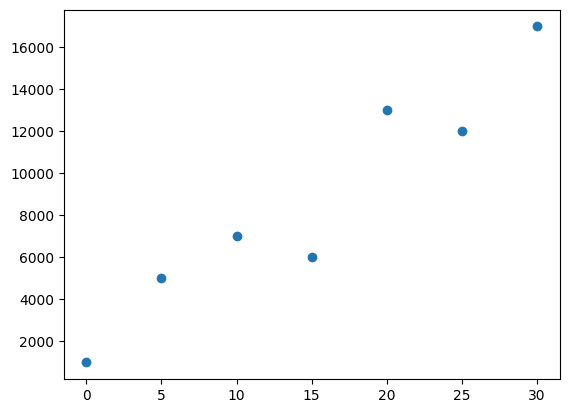

In [ ]:
# Graficamos un scatterplot de la base
plt.scatter(df["exp_laboral"],df["salario"])

In [ ]:
# Seleccionamos a la variable predictora y el target
x = df[["exp_laboral"]].values
y = df[["salario"]].values

In [ ]:
# Ajustamos el modelo de regresión lineal simple
from sklearn.linear_model import LinearRegression
mod_lineal = LinearRegression()
mod_lineal.fit(x,y)

LinearRegression()

In [ ]:
# Mostramos el valor del intercepto
mod_lineal.intercept_

array([1428.57142857])

In [ ]:
# Mostramos el valor del coeficiente
mod_lineal.coef_

array([[485.71428571]])

Resultado: El modelo de regresión lineal es Salario = 1428.57+485.714 Experiencia Laboral

In [ ]:
# Calculamos el y_estimado
y_est = mod_lineal.intercept_ + mod_lineal.coef_*x
y_est

array([[ 1428.57142857],
       [ 3857.14285714],
       [ 6285.71428571],
       [ 8714.28571429],
       [11142.85714286],
       [13571.42857143],
       [16000.        ]])

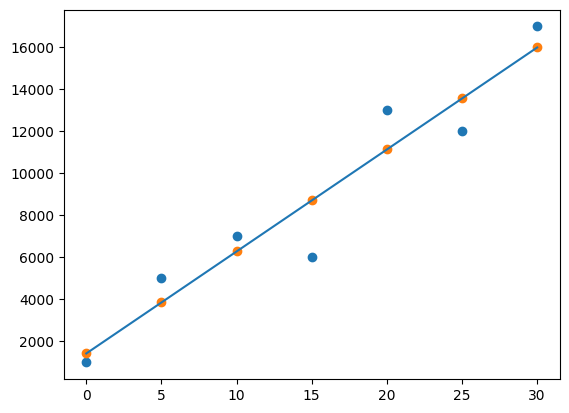

In [ ]:
# Graficamos en un mismo gráfico al y_real y y_est
plt.scatter(x,y)
plt.scatter(x,y_est)
plt.plot(x,y_est)
plt.show()

### Bondad de ajuste

Varaibles: Experiencia Laboral y Salario

In [ ]:
# Calculamos el R2
mod_lineal.score(x,y)

0.9102362204724409

### Métricas para calcular el error

In [ ]:
# Primero debemos obtener los residuales.
resid = y - y_est

#### MSE

In [ ]:
mse=sum(resid**2)/len(resid)
mse[0]

2326530.612244898

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y,y_est)

2326530.612244898

#### RMSE

In [ ]:
import math as m
rmse=m.sqrt(sum(resid**2)/len(resid))
rmse

1525.2968931473301

In [ ]:
m.sqrt(mean_squared_error(y,y_est))

1525.2968931473301

# Regresión Lineal Múltiple

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

**CASO**

El siguiente conjunto de datos se refiere a los costos médicos que cobra una compañía de seguros. Hay 1338 observaciones con 7 variables diferentes; 1 dependiente (cargos) y 6 independientes (edad, IMC, sexo, fumador, hijos, región). Los cargos son cuánto se cobra el seguro por los servicios médicos, que es un valor numérico. La edad, el IMC y los niños también son números enteros. Sexo y fumador son respuestas binarias (hombre o mujer y sí o no). La región es un estado categórico de ubicación. Las siguientes 6 variables afectan el monto cobrado.

In [ ]:
# Creamos variables para su posterior uso en la importación de la base
path = r"/content/drive/MyDrive/GEM PERU/1. Bussiness Analytics con Python/3. Inputs/".replace("\\","/")
name = "insurance.csv"

In [ ]:
# Importamos la base
df = pd.read_csv(path+"/"+name, sep = ",", header = 0)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df_pre = df.copy()

In [ ]:
# Revisando la correlación de las variables numéricas
df_pre.select_dtypes(include = np.number).corr(method = "pearson")

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
# Revisando la correlación de las variables categóricas
df_pre.select_dtypes(include = "object")

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
import scipy.stats as scis
var_cuali = df.select_dtypes(include = "object").columns
for i in var_cuali:
    for j in var_cuali:
        if i>j:
            prueba = scis.chi2_contingency(pd.crosstab(df[i],df[j]))
            print("p-valor Prueba Chi Cuadrado: ",i," - ",j,":",prueba[1])

p-valor Prueba Chi Cuadrado:  sex  -  region : 0.9328921288772233
p-valor Prueba Chi Cuadrado:  smoker  -  sex : 0.006548143503580696
p-valor Prueba Chi Cuadrado:  smoker  -  region : 0.06171954839170547


Variables no relacionadas: Sexo y Región

In [ ]:
pd.crosstab(df_pre["sex"],df_pre["region"])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [ ]:
pd.crosstab(df_pre["smoker"],df_pre["region"])

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [ ]:
scis.chi2_contingency(pd.crosstab(df["sex"],df["region"]))[1]

0.9328921288772233

In [ ]:
# Creamos las variables dummies para las variables categóricas
df_pre = pd.get_dummies(df_pre)
df_pre.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
# Escalamos a las variables numéricas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_escalado = scaler.fit_transform(df_pre[df_pre.columns.drop("charges")])
df_escalado = pd.DataFrame(df_escalado, columns = df_pre.columns.drop("charges"))
df_escalado = pd.concat([df_escalado,df_pre["charges"]], axis = 1)
df_escalado

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.021739,0.321227,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,0.000000,0.479150,0.2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1725.55230
2,0.217391,0.458434,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4449.46200
3,0.326087,0.181464,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,0.304348,0.347592,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,10600.54830
1334,0.000000,0.429379,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2205.98080
1335,0.000000,0.562012,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1629.83350
1336,0.065217,0.264730,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2007.94500


In [ ]:
# Guardamos el escalador para poder desescalar cuando sea necesario
import pickle
with open("/content/drive/MyDrive/GEM PERU/1. Bussiness Analytics con Python/4. Objetos guardados/escalador_rg.pkl","wb") as archivo:
    pickle.dump(scaler, archivo)

In [ ]:
# Abrimos el escalador para poder desescalara cuando sea necesario
with open("/content/drive/MyDrive/GEM PERU/1. Bussiness Analytics con Python/4. Objetos guardados/escalador_rg.pkl","rb") as archivo:
    scaler = pickle.load(archivo)

In [ ]:
# Verificamos los valores máximos de nuestro objeto escalado
scaler.data_max_

array([64.  , 53.13,  5.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  ,  1.  ])

In [ ]:
# Verificamos los valores mínimos de nuestro objeto escalado
scaler.data_min_

array([18.  , 15.96,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ])

In [ ]:
# Desescalamos las variables
scaler.inverse_transform(df_escalado.drop(columns = ["charges"]))

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  0.  ,  0.  ]])

In [ ]:
# Seleccionamos nuestras variables predictoras y target
x = df_escalado.drop(columns = ["charges"])
y = df_escalado["charges"]

In [ ]:
# Separamos la data en train y test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Base de entrenamiento
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
621,0.413043,0.488028,0.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
194,0.000000,0.496906,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
240,0.108696,0.557170,0.4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1168,0.304348,0.517622,0.4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1192,0.869565,0.442158,0.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
763,0.195652,0.270917,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
835,0.521739,0.538337,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1216,0.478261,0.245359,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
559,0.021739,0.526500,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Base de test
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
578,0.739130,0.383105,0.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
610,0.630435,0.360775,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
569,0.652174,0.661959,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1034,0.934783,0.603175,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
198,0.717391,0.056228,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1084,0.956522,0.391041,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
726,0.500000,0.334813,0.2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1132,0.847826,0.654291,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
725,0.260870,0.621200,0.6,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Ajustamos el modelo de regresión lineal múltiple
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
mod_lineal = LinearRegression()
mod_lineal.fit(x_train, y_train)

LinearRegression()

In [ ]:
mod_lineal.predict(x_train)

array([33600.,  3520., 30592., ...,  6016.,  4800.,  2240.])

In [ ]:
resid_train = y_train - mod_lineal.predict(x_train)
resid_test = y_test - mod_lineal.predict(x_test)

In [ ]:
# Calculamos el error cuadrático medio de train
mse=sum(resid_train**2)/len(resid_train)
mse

37723003.13552936

In [ ]:
# Calculamos el error cuadrático medio de test
mse=sum(resid_test**2)/len(resid_test)
mse

31942610.640282854

In [ ]:
# Calculamos el R2 para los datos de train
mod_lineal.score(x_train,y_train)

0.7368765009970442

In [ ]:
# Calculamos el R2 para los datos de test
mod_lineal.score(x_test,y_test)

0.7992671513638541

In [ ]:
mod_lineal.predict(x_train)

array([33600.,  3520., 30592., ...,  6016.,  4800.,  2240.])

In [ ]:
mod_lineal.coef_

array([ 1.16810003e+04,  1.23778442e+04,  2.07034641e+03, -3.09461798e+17,
       -3.09461798e+17, -7.03779526e+15, -7.03779526e+15,  2.63566454e+16,
        2.63566454e+16,  2.63566454e+16,  2.63566454e+16])

In [ ]:
# Reporte con los resultados de la regresión Lineal
import statsmodels.api as sm
x_train_new = sm.add_constant(x_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=x_train_new,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          2.08e-301
Time:                        02:43:48   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.056e+16   9.94e+15  

In [ ]:
# Reporte con los resultados de la regresión Lineal
import statsmodels.api as sm
x_test_new = sm.add_constant(x_test, prepend=True)
modelo = sm.OLS(endog=y_test, exog=x_test_new,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sun, 14 Apr 2024   Prob (F-statistic):           4.69e-87
Time:                        02:43:53   Log-Likelihood:                -2692.6
No. Observations:                 268   AIC:                             5403.
Df Residuals:                     259   BIC:                             5435.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4080.6721    528.719  

### Regularización Ridge

In [ ]:
from sklearn.linear_model import Ridge
rep_r2 = []
rep_rmse = []
for i in np.linspace(0,1,11):
    ridge = Ridge(alpha = i)
    ridge.fit(x_train, y_train)
    y_est = ridge.predict(x_train)
    # Calculamos las métricas
    rep_r2.append(ridge.score(x_train,y_train))
    rep_rmse.append(m.sqrt(mean_squared_error(y_train,y_est)))

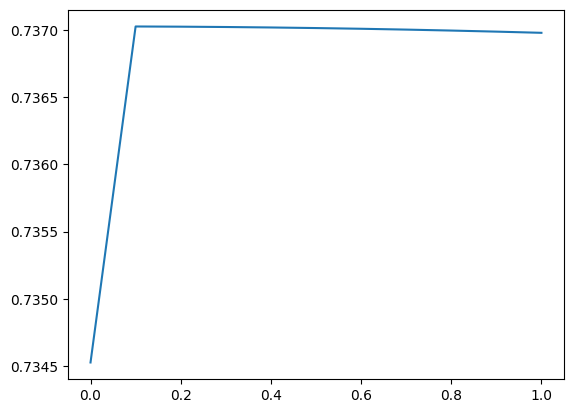

In [ ]:
# Gráfica entre el alpha y el r2
plt.plot(np.linspace(0,1,11), rep_r2)
plt.show()

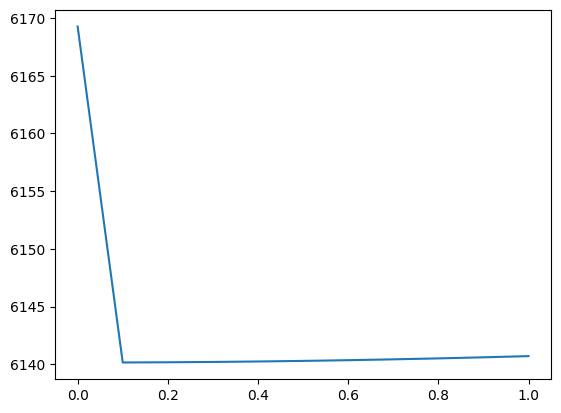

In [ ]:
# Gráfica entre el alpha y el rmse
plt.plot(np.linspace(0,1,11), rep_rmse)
plt.show()

In [ ]:
# Ajustamos la regresión lineal con el mejor alpha
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
resid_train = y_train - ridge.predict(x_train)
resid_tes = y_test - ridge.predict(x_test)

In [ ]:
# Calculamos el error cuadrático medio de train
mse=sum(resid_train**2)/len(resid_train)
mse

37701604.91109791

In [ ]:
# Calculamos el error cuadrático medio de test
mse=sum(resid_test**2)/len(resid_test)
mse

31942610.640282854

In [ ]:
# Calculamos el R2 para los datos de train
ridge.score(x_train,y_train)

0.7370257567618781

In [ ]:
# Calculamos el R2 para los datos de test
ridge.score(x_test,y_test)

0.7999494029161158

### Regularización Lasso

In [ ]:
from sklearn.linear_model import Lasso
rep_r2 = []
rep_rmse = []
for i in np.linspace(0,1,11):
    lasso = Lasso(alpha = i)
    lasso.fit(x_train, y_train)
    y_est = lasso.predict(x_train)
    # Calculamos las métricas
    rep_r2.append(lasso.score(x_train,y_train))
    rep_rmse.append(m.sqrt(mean_squared_error(y_train,y_est)))

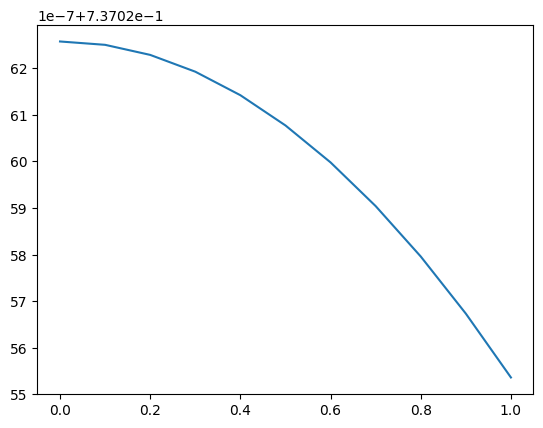

In [ ]:
# Gráfica entre el alpha y el r2
plt.plot(np.linspace(0,1,11), rep_r2)
plt.show()

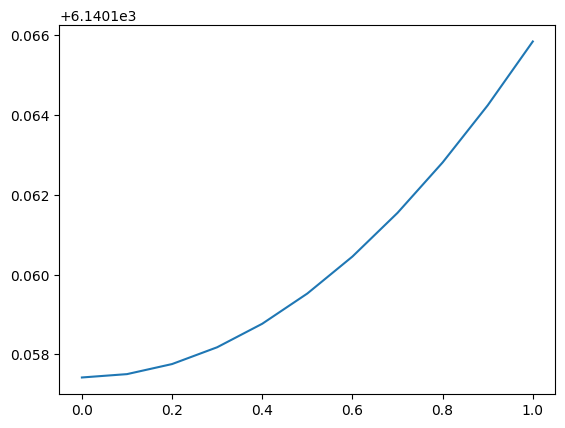

In [ ]:
# Gráfica entre el alpha y el rmse
plt.plot(np.linspace(0,1,11), rep_rmse)
plt.show()

In [ ]:
# Ajustamos la regresión lineal con el mejor alpha
lasso = Lasso(alpha = 0)
lasso.fit(x_train,y_train)

Lasso(alpha=0)

In [ ]:
resid_train = y_train - lasso.predict(x_train)
resid_test = y_test - lasso.predict(x_test)

In [ ]:
# Calculamos el error cuadrático medio de train
mse=sum(resid_train**2)/len(resid_train)
mse

37701533.1286291

In [ ]:
# Calculamos el error cuadrático medio de test
mse=sum(resid_test**2)/len(resid_test)
mse

31827950.229523875

In [ ]:
# Calculamos el R2 para los datos de train
lasso.score(x_train,y_train)

0.7370262574551634

In [ ]:
lasso.score(x_test,y_test)

0.7999876970680433

### Regularización Elastic Net

In [ ]:
# Calibramos los valores de alpha y l1_ratio
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
elastic = ElasticNet()
GS = GridSearchCV(estimator = elastic,
                  param_grid = {"alpha":[0,0.001, 0.01, 0.1, 10, 100],
                                "l1_ratio":[0,0.001, 0.005, 0.03, 0.17, 1.0]},
                  scoring = "neg_mean_squared_error",
                  cv = 10)

In [ ]:
# Entrenamos el modelo
GS.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.001, 0.01, 0.1, 10, 100],
                         'l1_ratio': [0, 0.001, 0.005, 0.03, 0.17, 1.0]},
             scoring='neg_mean_squared_error')

In [ ]:
# Mostramos el mejor modelo resultado del Grid Search
GS.best_params_

{'alpha': 10, 'l1_ratio': 1.0}

In [ ]:
# Ajustamos el modelo con los mejores valores de alpha y l1_ratio
elastic = ElasticNet(alpha = 10, l1_ratio = 1)
elastic.fit(x_train,y_train)

ElasticNet(alpha=10, l1_ratio=1)

In [ ]:
resid_train = y_train - elastic.predict(x_train)
resid_test = y_test - elastic.predict(x_test)

In [ ]:
# Calculamos el error cuadrático medio de test
mse=sum(resid_train**2)/len(resid_train)
mse

37711404.18051278

In [ ]:
# Calculamos el error cuadrático medio de test
mse=sum(resid_test**2)/len(resid_test)
mse

31931879.620711792

In [ ]:
# Calculamos el R2 para los datos de train
elastic.score(x_train,y_train)

0.7369574054154377

In [ ]:
# Calculamos el R2 para los datos de test
elastic.score(x_test,y_test)

0.7993345869329603

In [ ]:
reporte = {"r2_lineal":[mod_lineal.score(x_train,y_train),mod_lineal.score(x_test,y_test)],
              "r2_ridge":[ridge.score(x_train,y_train),ridge.score(x_test,y_test)],
              "r2_lasso":[lasso.score(x_train,y_train),lasso.score(x_test,y_test)],
              "r2_elasticnet":[elastic.score(x_train,y_train),elastic.score(x_test,y_test)]}
reporte = pd.DataFrame(reporte, index = ["train","test"])
reporte

,r2_lineal,r2_ridge,r2_lasso,r2_elasticnet
train,0.736877,0.737026,0.737026,0.736957
test,0.799267,0.799949,0.799988,0.799335
